### Import and install some usefull libraries

In [1]:
!pip install Google2Pandas
!pip install geonamescache
!pip install chart-studio
!pip install pmdarima

     |████████████████████████████████| 2.6MB 6.6MB/s 
     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 1.5MB 6.8MB/s 
     |████████████████████████████████| 2.1MB 19.1MB/s 
     |████████████████████████████████| 9.5MB 35.4MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
from google2pandas import *
# import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from pylab import rcParams

import plotly.express as px
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
from getpass import getpass
import json # JSON encoder and decoder for Python
import requests # Library for sending HTTP requests

#### Get API link from here
https://ga-dev-tools.appspot.com/query-explorer/#report-end


In [ ]:
api_query_uri = getpass('Enter API Query URI here')

Enter API Query URI here··········


In [ ]:
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df1 = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df1 = df1.rename(columns={0: 'Date', 1: 'Sessions'}) # giving the columns some proper titles
df1['Sessions'] = df1['Sessions'].astype(int) # formatting sessions as ints
df1['Date'] = pd.to_datetime(df1['Date'])

df1.head() # printing the first five rows

,Date,Sessions
0,2019-01-01,17
1,2019-01-02,16
2,2019-01-03,11
3,2019-01-04,14
4,2019-01-05,16


In [ ]:
api_query_uri = getpass('Enter API Query URI here')

Enter API Query URI here··········


In [ ]:
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Device Category', 1: 'Country', 2: 'Date', 3:'Session'}) # giving the columns some proper titles
df['Date'] = pd.to_datetime(df['Date'])
df['Device Category'] = df['Device Category'].astype(str) 
df['Country'] = df['Country'].astype(str) 
df['Session'] = df['Session'].astype(int) # formatting sessions as ints

df.head() # printing the first five rows

,Device Category,Country,Date,Session
0,desktop,(not set),2019-01-05,1
1,desktop,(not set),2019-01-07,1
2,desktop,(not set),2019-01-11,2
3,desktop,(not set),2019-01-29,1
4,desktop,(not set),2019-02-01,1


In [ ]:
api_query_uri = getpass('Enter API Query URI here')

Enter API Query URI here··········


In [ ]:
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Date', 1: 'Transaction'}) # giving the columns some proper titles
df['Date'] = pd.to_datetime(df['Date'])
df['Transaction'] = df['Transaction'].astype(int) 

df.head() # printing the first five rows

,Date,Transaction
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0


In [ ]:
df.to_csv('transaction.csv',index=False)

In [ ]:
df.to_csv('session_date_country.csv',index=False)
df1.to_csv('session_date.csv',index=False)

#### This data set contains Daily count of Sessions Id's(Users) for an CakeGift Site from year Jan 2019 thru March 2021

In [106]:
d = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date.csv', index_col=0, parse_dates=True )
d.head()

,Sessions
Date,
2019-01-01,17
2019-01-02,16
2019-01-03,11
2019-01-04,14
2019-01-05,16


## Visualisations 

* Graphical Analysis of Time Series data is an important step of time series analysis and helps to provides an insight on the data and understand what data is telling us.

* Data visualization is a crucial step and should be the first step before starting with time series modelling

* it’s important to know before modelling that how the variables are correlated, what are the value ranges and how it is effected by the time period. Is the data is consistent and uniform and many more aspects of a data can be learnt using Graphical analysis

#### Time Series Analysis with Line Plot

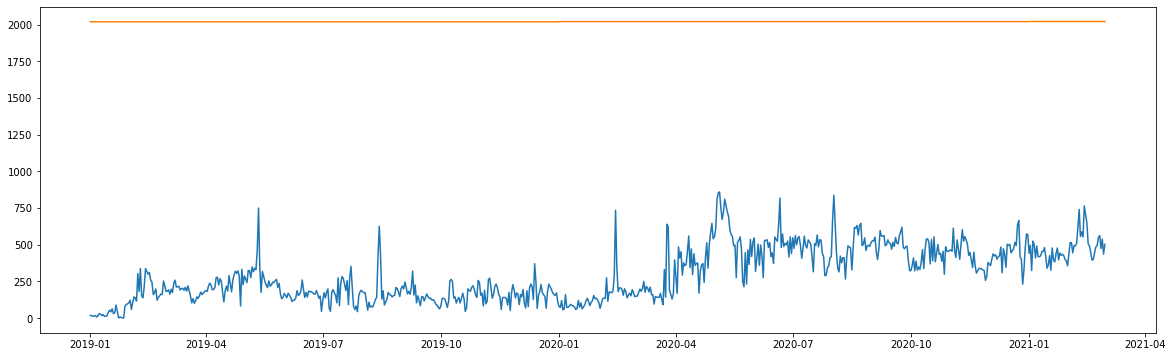

In [132]:
plt.figure(figsize=(20,6))
plt.plot(d)
plt.show()

In [133]:
d = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date.csv', parse_dates=True )
d.head()

,Date,Sessions
0,2019-01-01,17
1,2019-01-02,16
2,2019-01-03,11
3,2019-01-04,14
4,2019-01-05,16


* This is a univariate data so we will have Month on X-axis and Number of Passengers on Y-Axis. We can also choose the linestyle, marker color for each data points and marker size as well

Text(0, 0.5, 'Users')

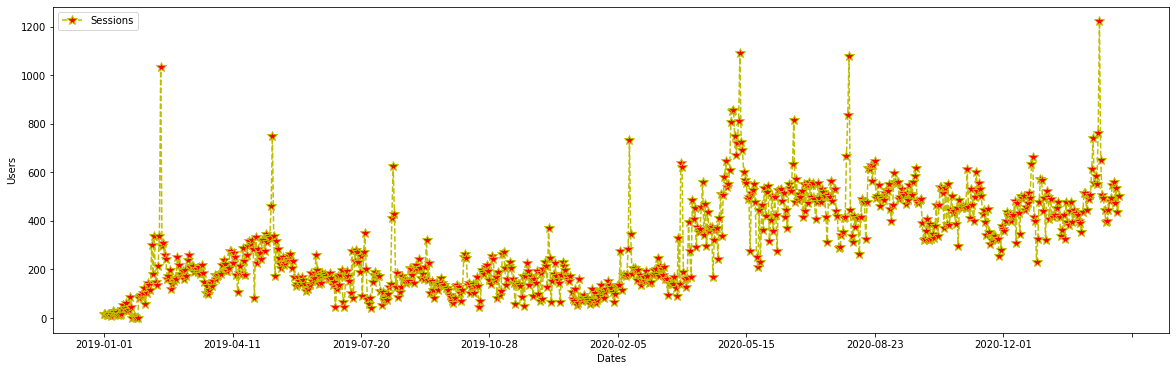

In [134]:
d.plot(x='Date',y='Sessions',figsize=(20,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)

plt.xlabel('Dates')
plt.ylabel('Users')

In [135]:
d.describe()

,Sessions
count,791.000000
mean,298.554994
std,187.059015
min,0.000000
25%,151.000000
50%,246.000000
75%,451.500000
max,1222.000000


#### Time Series Lag Plot

* A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

* For plotting lag chart we can use Pandas lag_plot() function. The x-axis contains y(t) and y-axis contains the data point after 1 lag point i.e. y(t+1)

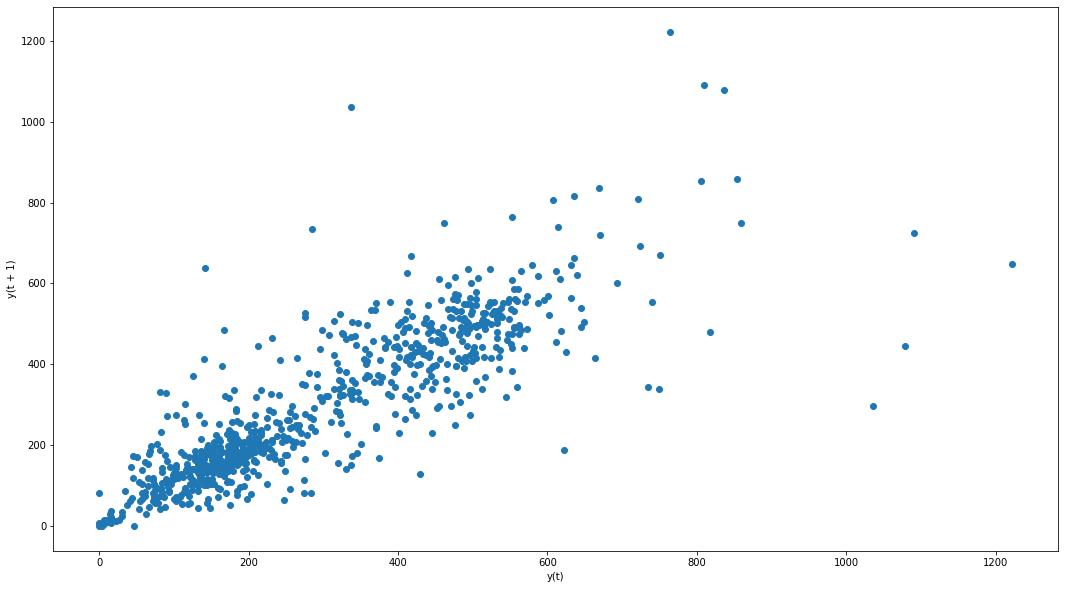

In [136]:
pd.plotting.lag_plot(d['Sessions'])

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date_country.csv')
df.head()

,Device Category,Country,Date,Session
0,desktop,(not set),2019-01-05,1
1,desktop,(not set),2019-01-07,1
2,desktop,(not set),2019-01-11,2
3,desktop,(not set),2019-01-29,1
4,desktop,(not set),2019-02-01,1


In [138]:
df["Country"]= df["Country"].replace('(not set)', "NA") 

In [139]:
df.head()

,Device Category,Country,Date,Session
0,desktop,NA,2019-01-05,1
1,desktop,NA,2019-01-07,1
2,desktop,NA,2019-01-11,2
3,desktop,NA,2019-01-29,1
4,desktop,NA,2019-02-01,1


In [140]:
d['Month'] = pd.to_datetime(d.Date).dt.to_period('m').dt.strftime('%Y-%m')
d['Month'] = pd.to_datetime(d['Month'], errors='coerce')
d['Month_Name'] = d['Month'].dt.month
d['Year']=d['Month'].dt.year

In [141]:
d.head()

,Date,Sessions,Month,Month_Name,Year
0,2019-01-01,17,2019-01-01,1,2019
1,2019-01-02,16,2019-01-01,1,2019
2,2019-01-03,11,2019-01-01,1,2019
3,2019-01-04,14,2019-01-01,1,2019
4,2019-01-05,16,2019-01-01,1,2019


#### Heatmap and Hexbin Plot
* We will make a 2D histogram or a density heatmap using matplotlib hist2d() function with Year on X-axis and Number of Passengers on Y-axis

(array([[39., 42.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 6., 54., 29.,  1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [19., 34.,  6.,  2.,  0.,  1.,  0.,  0.,  0.,  0.],
        [24., 59.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [33., 27.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 6., 48., 15., 12.,  5.,  3.,  1.,  0.,  0.,  0.],
        [ 0.,  2., 11., 24., 43.,  5.,  5.,  1.,  1.,  0.],
        [ 0.,  0.,  5., 20., 27.,  7.,  1.,  0.,  1.,  0.],
        [ 0.,  1., 23., 45., 20.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  5., 31., 19.,  2.,  2.,  0.,  0.,  1.]]),
 array([1.5463008e+18, 1.5531264e+18, 1.5599520e+18, 1.5667776e+18,
        1.5736032e+18, 1.5804288e+18, 1.5872544e+18, 1.5940800e+18,
        1.6009056e+18, 1.6077312e+18, 1.6145568e+18]),
 array([   0. ,  122.2,  244.4,  366.6,  488.8,  611. ,  733.2,  855.4,
         977.6, 1099.8, 1222. ]),
 <matplotlib.collections.QuadMesh at 0x7f24ef24b450>)

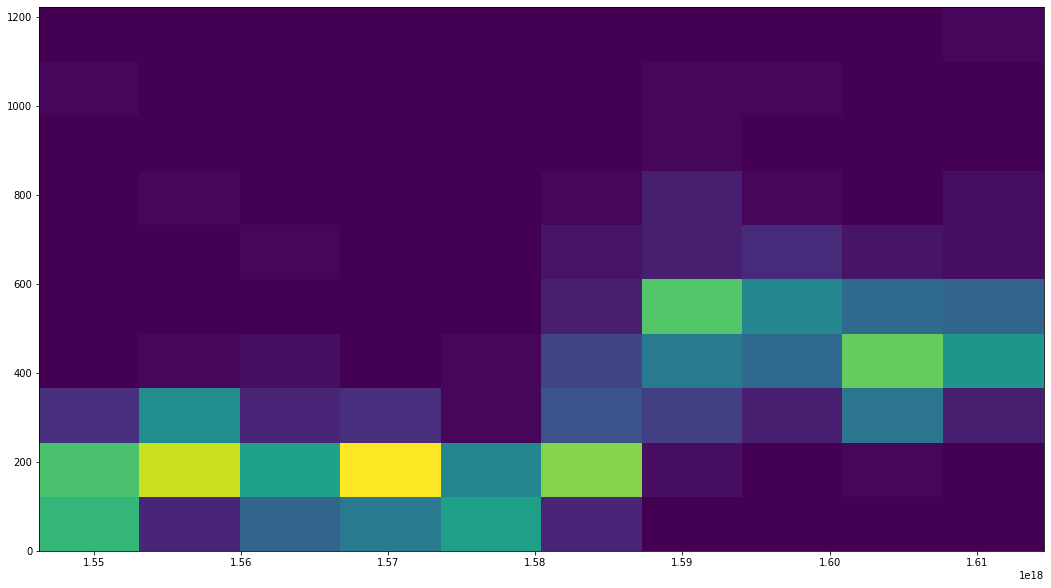

In [142]:
x=d['Month']
y=d['Sessions']
plt.hist2d(x, y)

#### 3D Visualization of Time Series Plot
* Let’s create two additional columns i.e. Month and Year. We will extract the values of these columns from the Month column

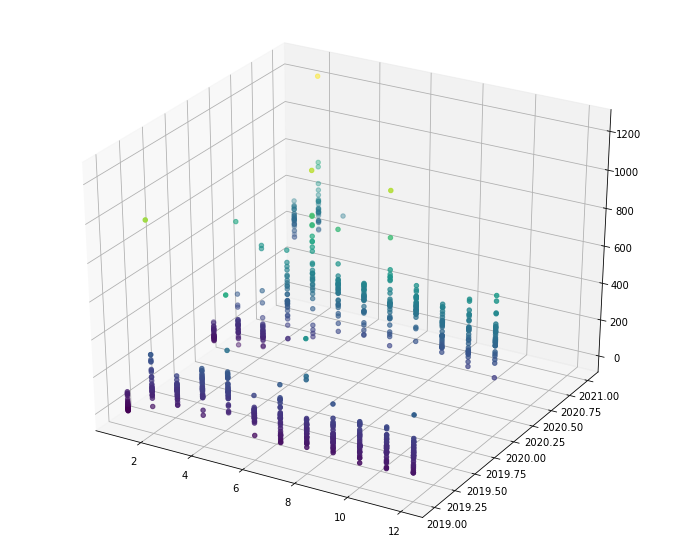

In [143]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ydata = d['Year']
xdata = d['Month_Name']
zdata = d['Sessions']
ax.scatter3D(xdata, ydata, zdata, c=zdata);

### Moving Average and Exponential Weighted Moving Average (EWMA)

* Moving Average(MA) and Exponential Weighted Moving Average(EWMA) is a rolling window function and is very critical steps for time series analysis which is used to aggregate the data and compress it.

* These functions are used to smooth the data to remove outliers and noise from the data and allowing the patterns and trends in data more visible and standout. It will smooth out short-term fluctuations and highlight longer-term trends or cycles

In [144]:
d['rolling_mean']=d['Sessions'].rolling(12).mean()

In [145]:
d.sample(10)

,Date,Sessions,Month,Month_Name,Year,rolling_mean
565,2020-07-19,497,2020-07-01,7,2020,475.250000
649,2020-10-11,337,2020-10-01,10,2020,359.083333
517,2020-06-01,545,2020-06-01,6,2020,417.833333
205,2019-07-25,79,2019-07-01,7,2019,211.333333
422,2020-02-27,193,2020-02-01,2,2020,177.083333
161,2019-06-11,186,2019-06-01,6,2019,145.083333
16,2019-01-17,42,2019-01-01,1,2019,24.083333
775,2021-02-14,1222,2021-02-01,2,2021,623.500000
388,2020-01-24,113,2020-01-01,1,2020,90.416667
64,2019-03-06,174,2019-03-01,3,2019,181.083333


* Exponential Smoothing(EWMA) unlike moving average which doesn’t treat all the data points equally while smoothing. Most of the time in a Time series data we want to treat the most recent data with more weight than the previous data

* n EWMA we are weighting the more recent points higher than the lags or lesser recent points. You can read more about smoothing and EWMA in this post

* Let’s Calculate the EWMA for our data using Pandas ewm() function with a smoothing level of 0.6. You can try with different alpha levels and check the output and use the most appropriate alpha level for your data



In [146]:
d['EWM_ALPHA_06'] = d['Sessions'].ewm(alpha=0.2).mean()

In [147]:
d.tail()

,Date,Sessions,Month,Month_Name,Year,rolling_mean,EWM_ALPHA_06
786,2021-02-25,562,2021-02-01,2,2021,553.416667,520.968183
787,2021-02-26,474,2021-02-01,2,2021,491.083333,511.574546
788,2021-02-27,537,2021-02-01,2,2021,481.750000,516.659637
789,2021-02-28,435,2021-02-01,2,2021,475.916667,500.327710
790,2021-03-01,502,2021-03-01,3,2021,476.666667,500.662168


**Now let’s plot these two Columns rolling means and EWMA with the original data and check how does the new smoothed values look like**

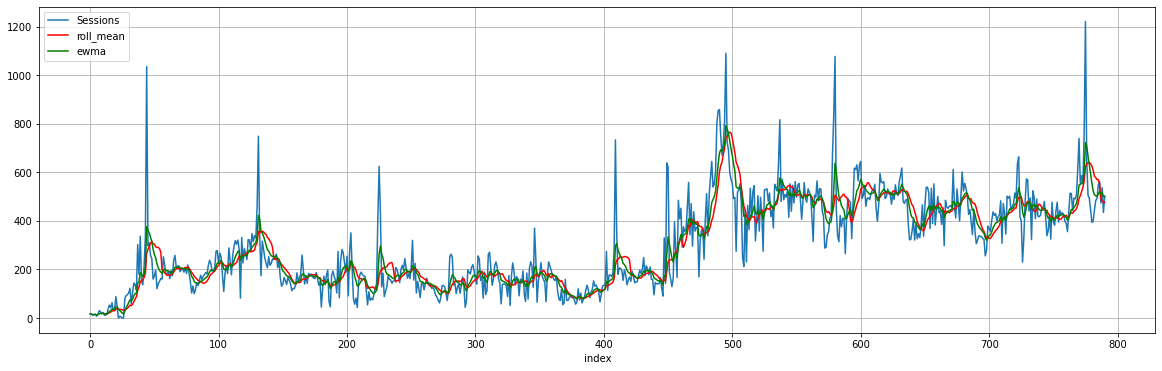

In [148]:
d.reset_index().plot(figsize=(20,6),kind='line',x = 'index', y = 'Sessions')
plt.grid(True)
plt.plot(d['rolling_mean'],label='roll_mean',color='r')
plt.plot(d['EWM_ALPHA_06'],label='ewma',color='g')
plt.legend(loc=2)
plt.show()

#### Autocorrelation(ACF) and PACF
* We can learn some important properties of our time series data with the help of Auto Correlation(ACF) and Partial Auto Correlation (PACF) graphs. This provide useful descriptive properties for understanding which model can be used for time series forecasting

* We have total 30 lags on X-axis and auto Correlation on the Y-axis and the line at Y=0 is the mean. All the correlation values are above the mean and a positive value

* ACF measures the linear relationships between observations at different time lags. In other words ACF is used to understand if there exists a correlation between a time series data point with another point as a function of their time difference

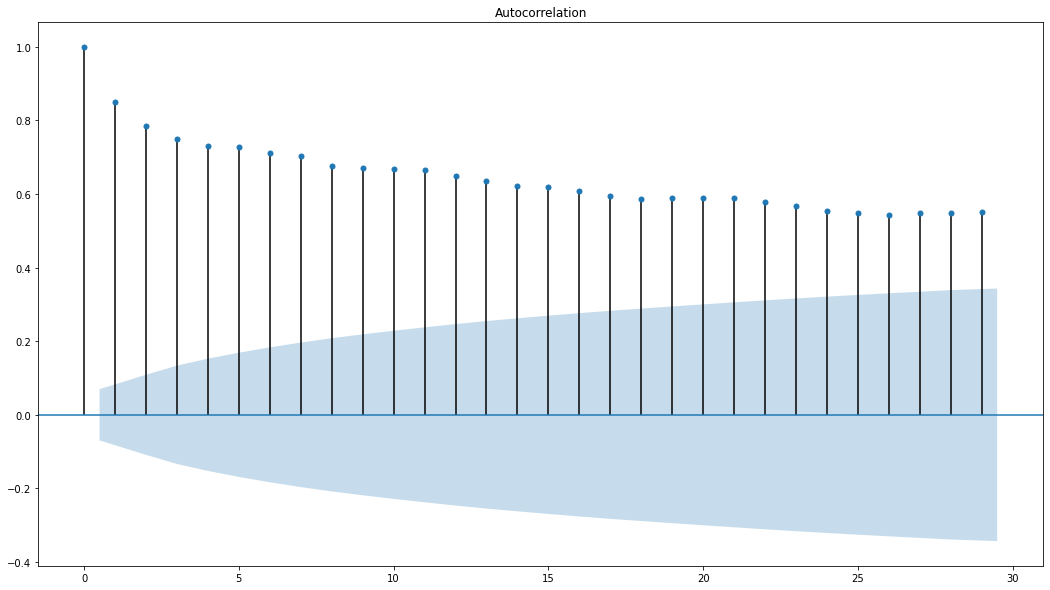

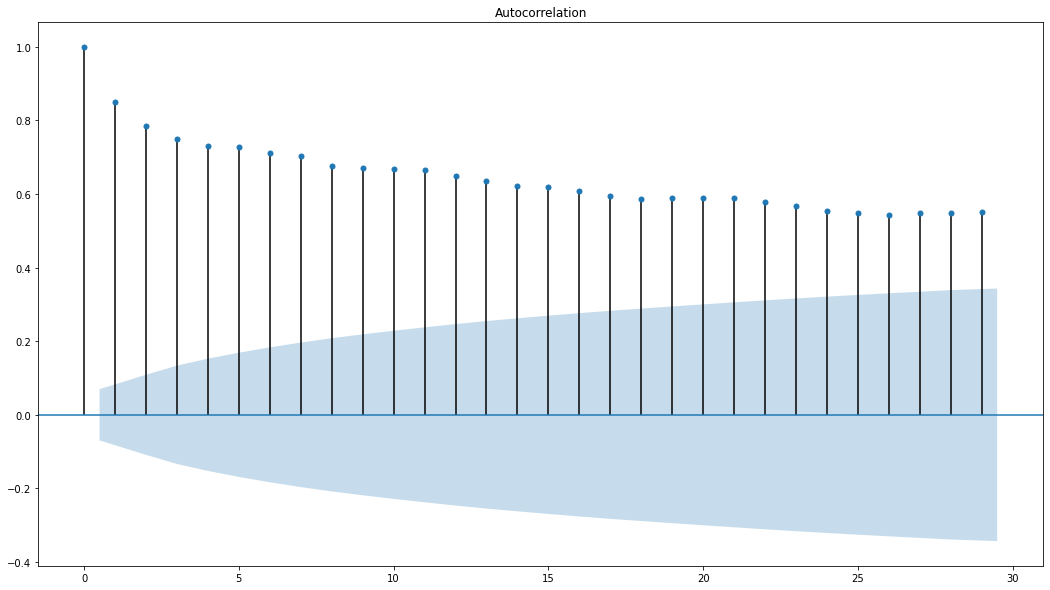

In [149]:
sm.graphics.tsa.plot_acf(d.Sessions)

* The Partial Auto Correlation factor(PACF) is the partial correlation between the two points at a specific lag of time. plotting the partial autocorrelative functions one could determine the appropriate lags p in an AR (p) model or in an extended ARIMA (p,d,q) model

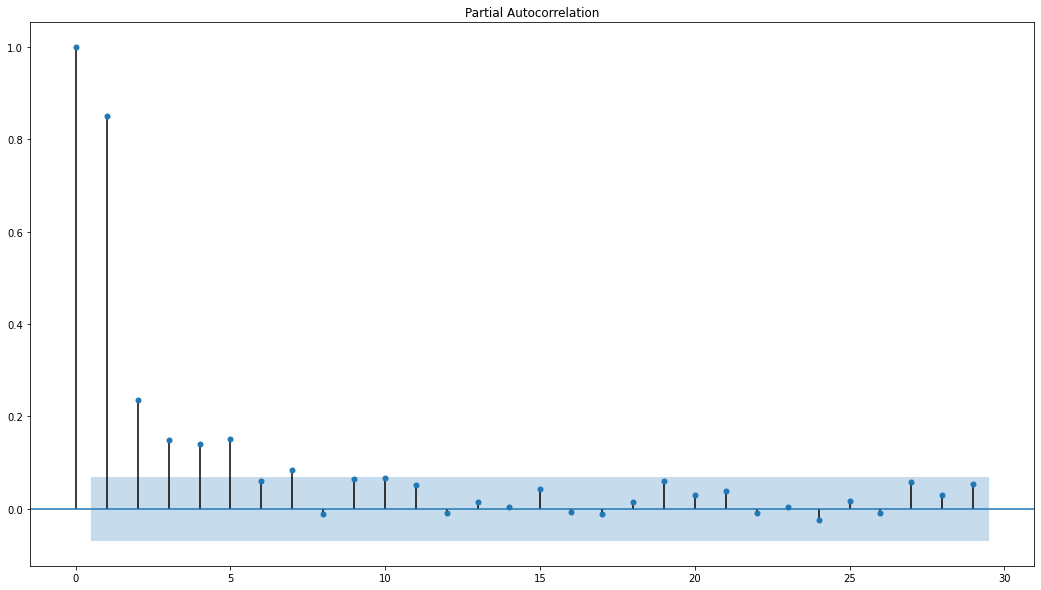

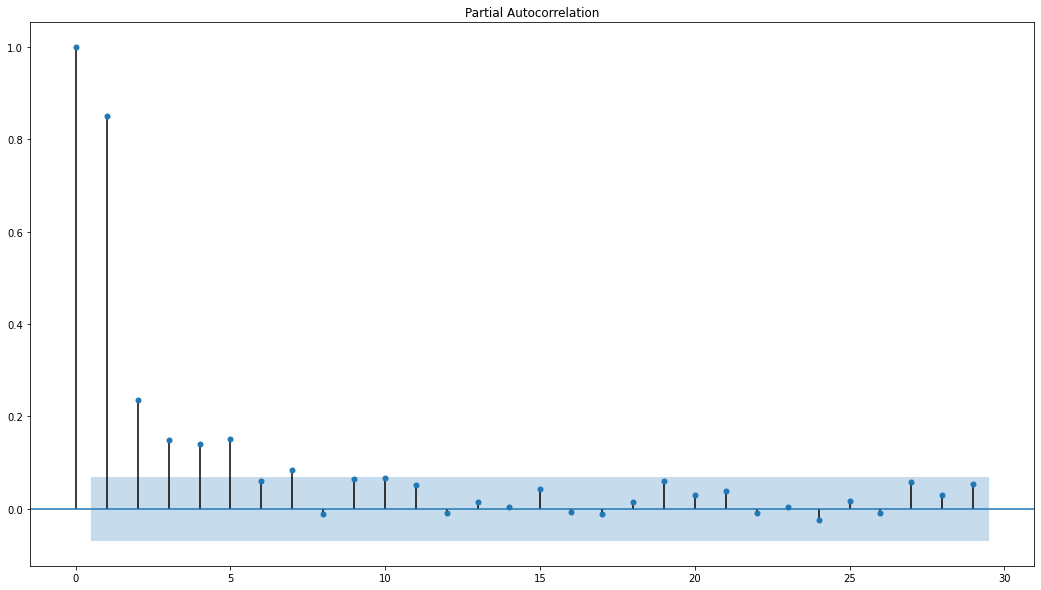

In [150]:
sm.graphics.tsa.plot_pacf(d.Sessions)

#### Box and Whisker Plot
* A box plot grouped by Year to visualize the data distribution for Sessions(UserId) count by Year .

* The whiskers at the end of each box shows the Inter-Quartile Range and any data point above or below this whiskers are considered as an outlier

In [151]:
d.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



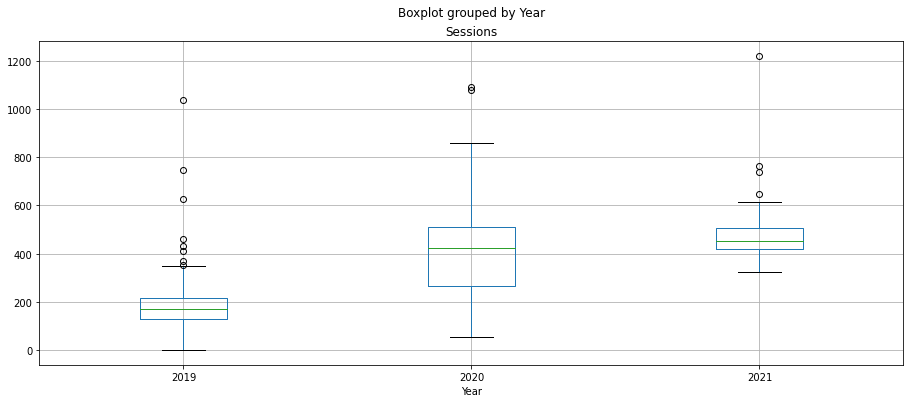

In [152]:
d.boxplot(figsize=(15,6),by='Year',column='Sessions')

In [153]:
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sessions        299.250000
Month_Name        6.000000
Year              1.000000
rolling_mean    286.458333
EWM_ALPHA_06    283.831996
dtype: float64


In [154]:
d = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date.csv', parse_dates=True )
d.head()

,Date,Sessions
0,2019-01-01,17
1,2019-01-02,16
2,2019-01-03,11
3,2019-01-04,14
4,2019-01-05,16


In [155]:
d['Month'] = pd.to_datetime(d.Date).dt.to_period('m').dt.strftime('%Y-%m')
d['Month'] = pd.to_datetime(d['Month'], errors='coerce')
d['Year']=d['Month'].dt.year


# Convert your daily column from just string to DateTime (skip if already done)
d['Date'] = pd.to_datetime(d['Date'])
# Set the column 'Date' as index (skip if already done)
d = d.set_index('Date')

In [156]:
d = d.drop(columns=['Month'])

In [157]:
d = d[~((d < (Q1 - 1.5 * IQR)) |(d > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



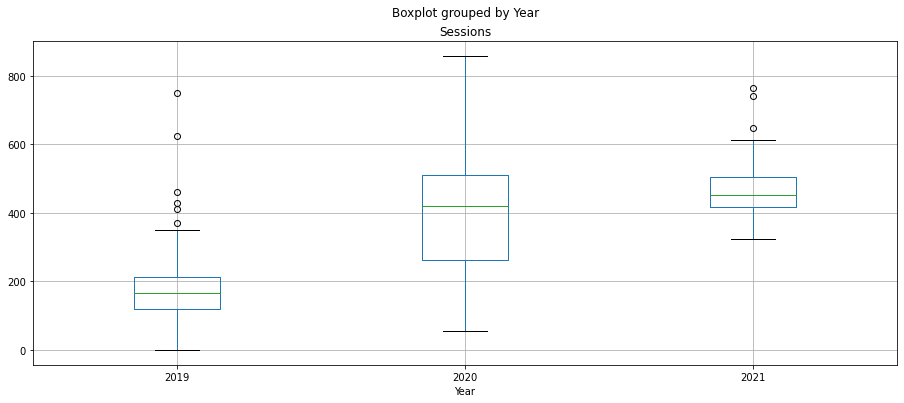

In [158]:
d.boxplot(figsize=(15,6),by='Year',column='Sessions')

In [159]:
dm = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date.csv', parse_dates=True )
dm.head()

,Date,Sessions
0,2019-01-01,17
1,2019-01-02,16
2,2019-01-03,11
3,2019-01-04,14
4,2019-01-05,16


In [160]:
# Convert your daily column from just string to DateTime (skip if already done)
dm['Date'] = pd.to_datetime(dm['Date'])
# Set the column 'Date' as index (skip if already done)
dm = dm.set_index('Date')

#### Decomposition
* Time series decomposition is the process of separating time series data into its core components. These components include a potential trend (overall rise or fall in the mean), seasonality (a recurring cycle), and the remaining random residual

In [161]:
dm = dm['Sessions'].resample('MS').mean()

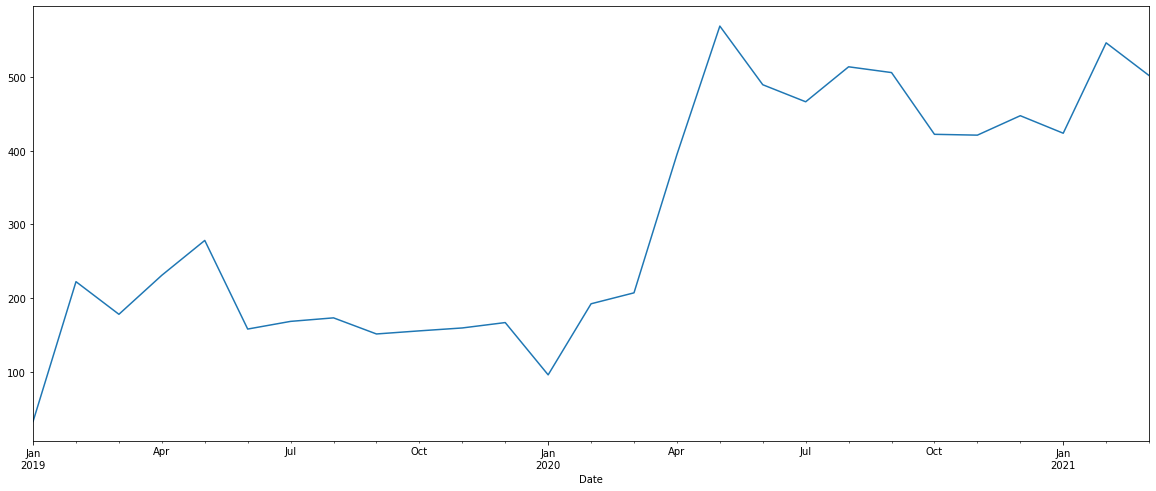

In [162]:
dm.plot(figsize=(20,8))

In [163]:
decom = sm.tsa.seasonal_decompose(dm, model='additive')

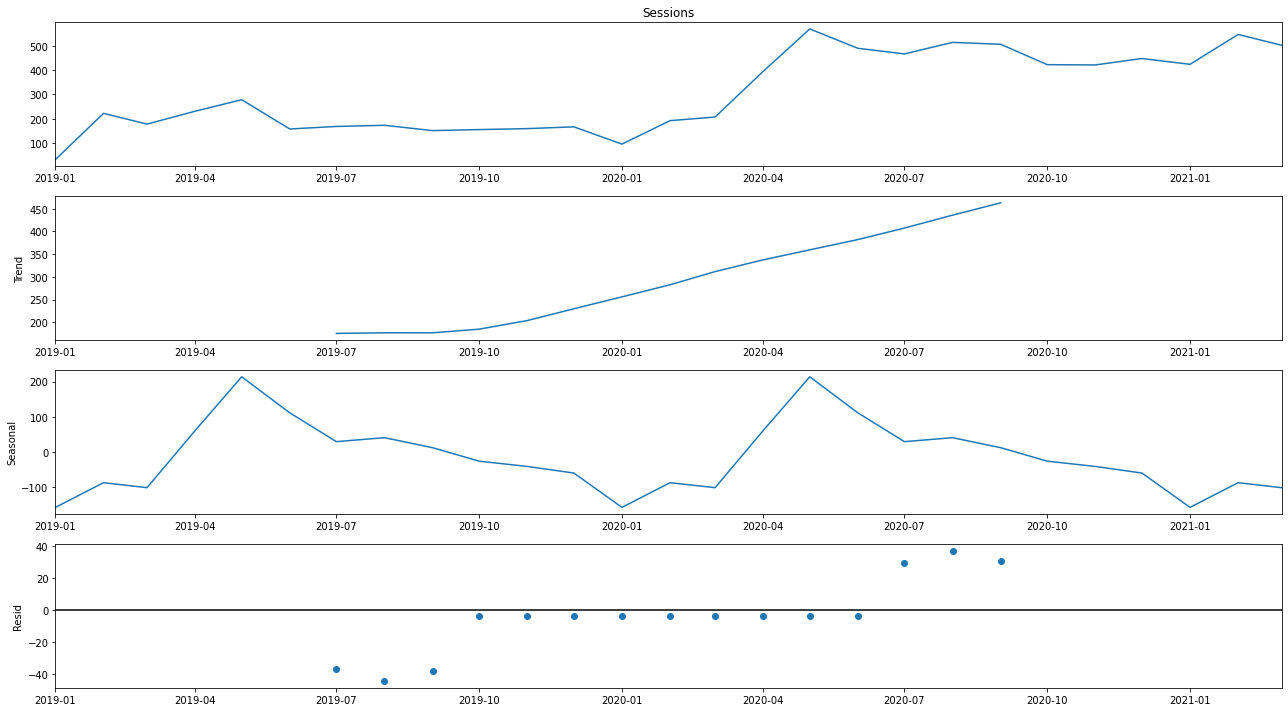

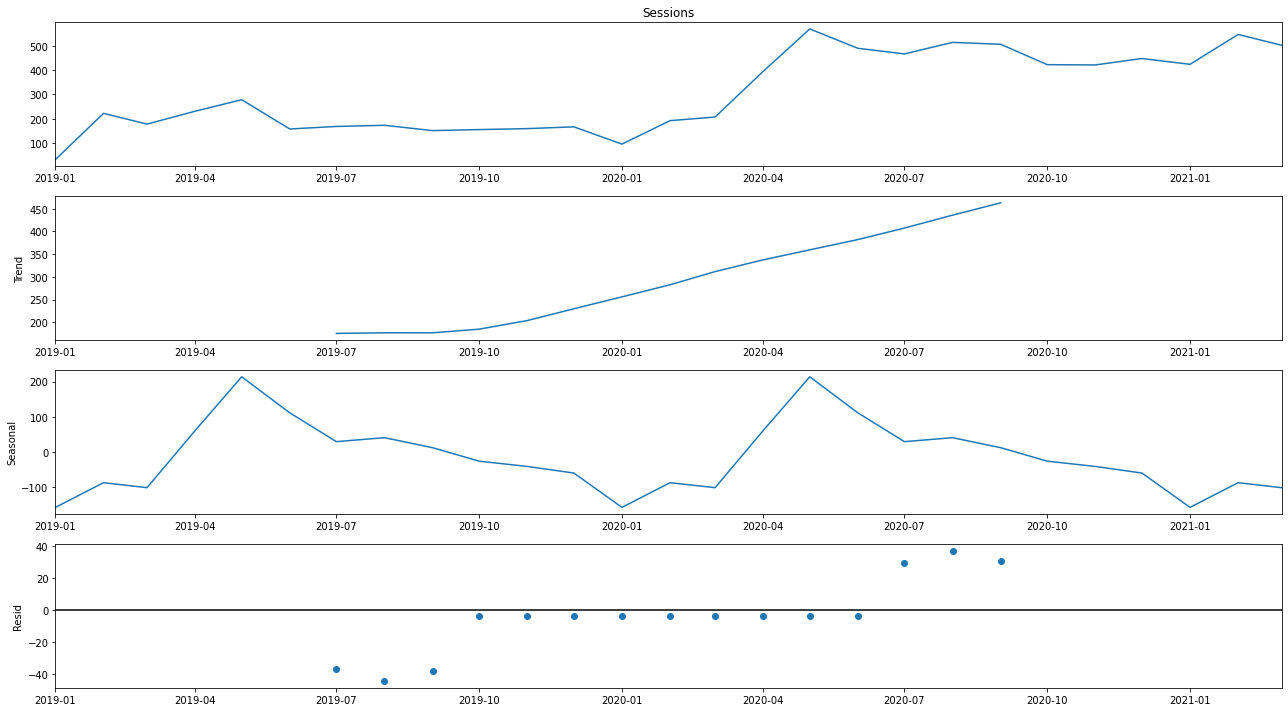

In [164]:
rcParams['figure.figsize'] = 18,10
decom.plot()


## Time Series Forecasting using ARIMA
* ARIMA - Autoregressive Integrated Moving Average
* ARIMA is one of the simple & most often used method for time series prediction.
* ARIMA consist of 3 things -p(seasonality),d(trend),q(noise)
* A popular and widely used statistical method for time series forecasting is the ARIMA model. It is a class of model that captures a suite of different standard temporal structures in time series data.

In [175]:
df = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/transaction.csv')

In [176]:
df.head()

,Date,Transaction
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0


In [177]:
# Convert your daily column from just string to DateTime (skip if already done)
df['Date'] = pd.to_datetime(df['Date'])
# Set the column 'Date' as index (skip if already done)
df = df.set_index('Date')

In [178]:
df = df['Transaction'].resample('MS').mean()

In [179]:
df.head()

Date
2019-01-01    0.000000
2019-02-01    0.000000
2019-03-01    2.290323
2019-04-01    3.333333
2019-05-01    4.709677
Freq: MS, Name: Transaction, dtype: float64

In [180]:
df.describe()

count    27.000000
mean      6.460345
std       4.557667
min       0.000000
25%       3.095161
50%       5.241379
75%       9.080645
max      16.566667
Name: Transaction, dtype: float64

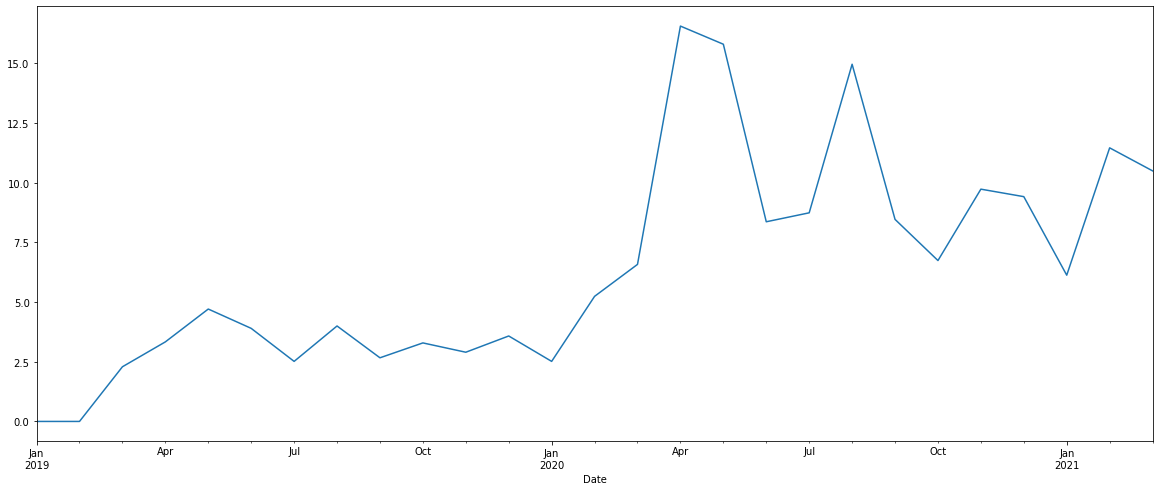

In [181]:
df.plot(figsize=(20,8))

In [182]:
df = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/transaction.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [173]:
df.head()

Date
2019-01-01    0
2019-01-02    0
2019-01-03    0
2019-01-04    0
2019-01-05    0
Name: Transaction, dtype: int64

####Autocorrelation plot

* Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelation for data values at varying time lags. It shows the properties of a type of data known as a time series. 

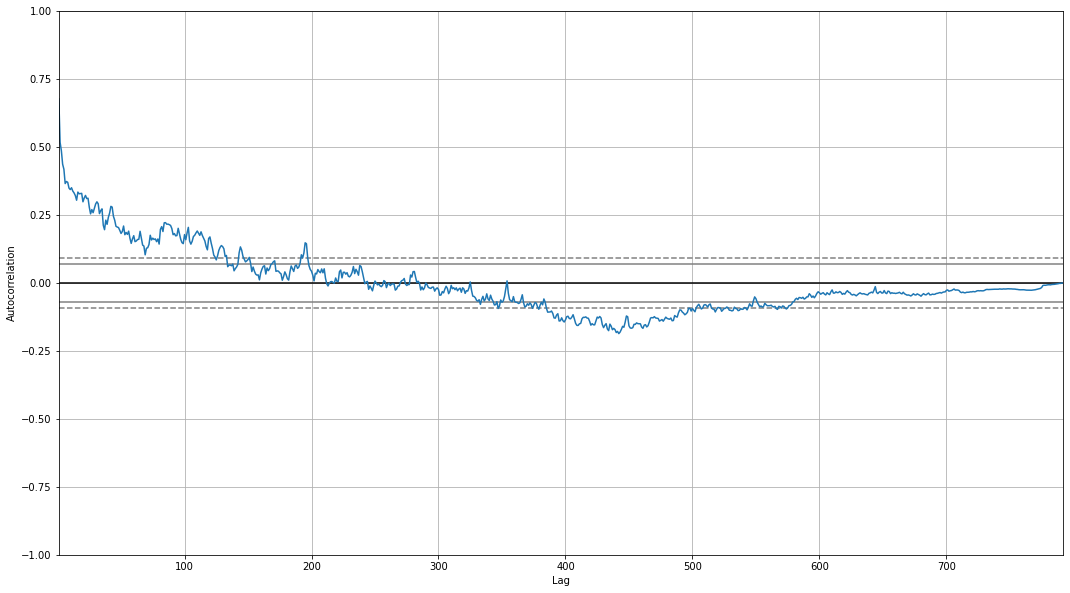

In [183]:
autocorrelation_plot(df)
pyplot.show()

## ARIMA Model for Time Series Forecasting in Python
#### Introduction
* A popular and widely used statistical method for time series forecasting is the ARIMA model. Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting and provide complementary approaches to the problem. While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

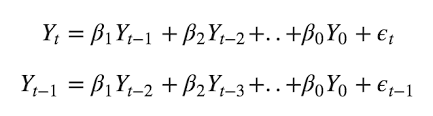

**ARIMA is an acronym that stands for Auto-Regressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.**

* The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of difference.
* q: The size of the moving average window, also called the order of moving average.


In [269]:
d = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date.csv')#, index_col = 0, parse_dates=True)

In [201]:
d.head()

,Date,Sessions
0,2019-01-01,17
1,2019-01-02,16
2,2019-01-03,11
3,2019-01-04,14
4,2019-01-05,16


In [271]:
df = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/transaction.csv')#, index_col=0, parse_dates=True )

In [203]:
df.head()

,Date,Transaction
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0


In [205]:
# Removing Null Values from dataset
fd = (df['Transaction'] != 0)
f = (d['Sessions'] != 0)

In [206]:
df = df.loc[fd]
d = d.loc[f]

In [209]:
aa_fit_df = auto_arima(df['Transaction'],trace=True,suppress_warnings=True)
aa_fit_df.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4200.230, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4368.830, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4326.132, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4271.515, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4366.832, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4204.300, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4204.381, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4198.759, Time=1.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4198.533, Time=0.71 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4262.812, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4200.216, Time=1.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4269.715, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4248.310, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4200.120, Time=1.43 sec
 ARIMA(3,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  685
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -2093.454
Date:                Mon, 08 Mar 2021   AIC                           4196.907
Time:                        06:47:04   BIC                           4219.547
Sample:                             0   HQIC                          4205.668
                                - 685                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5014      0.017     29.408      0.000       0.468       0.535
ar.L2         -0.0497      0.023     -2.161      0.031      -0.095      -0.005
ar.L3          0.1150      0.028      4.048      0.000       0.059       0.171
ma.L1         -0.9640      0.010    -93.377      0.000      -0.984      -0.944
sigma2        26.6089      0.560     47.519      0.000      25.511      27.706
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6348.87
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.79   Skew:                             2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [215]:
aa_fit_d = auto_arima(d['Sessions'],trace=True,suppress_warnings=True)
aa_fit_d.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9346.400, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9520.975, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9451.515, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9398.341, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9519.003, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9350.027, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9350.135, Time=0.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9345.518, Time=1.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9352.039, Time=1.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9347.421, Time=2.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9347.064, Time=2.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9345.588, Time=1.76 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9353.099, Time=1.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=9349.094, Time=2.80 sec
 ARIMA(3,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  788
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -4666.339
Date:                Mon, 08 Mar 2021   AIC                           9344.678
Time:                        06:50:21   BIC                           9372.688
Sample:                             0   HQIC                          9355.447
                                - 788                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5255      0.032    -16.601      0.000      -0.587      -0.463
ar.L2          0.4759      0.038     12.514      0.000       0.401       0.550
ar.L3          0.0706      0.031      2.311      0.021       0.011       0.131
ma.L1          0.0729      0.023      3.171      0.002       0.028       0.118
ma.L2         -0.8951      0.021    -42.118      0.000      -0.937      -0.853
sigma2      8260.7781    195.258     42.307      0.000    7878.079    8643.478
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4721.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             1.65
Prob(H) (two-sided):                  0.13   Kurtosis:                        14.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [213]:
print(df.shape)
train_df = df.iloc[:-60] 
test_df = df.iloc[-30:]
print(train_df.shape,test_df.shape)

(685, 2)
(625, 2) (30, 2)


In [214]:
print(d.shape)
train_d = d.iloc[:-60]
test_d = d.iloc[-30:]
print(train_d.shape, test_d.shape)

(788, 2)
(728, 2) (30, 2)


In [218]:
model_df=ARIMA(df['Transaction'],order=(3,1,1))
model_fit_df=model_df.fit()
model_fit_df.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmode

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Transaction   No. Observations:                  684
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2093.267
Method:                       css-mle   S.D. of innovations              5.157
Date:                Mon, 08 Mar 2021   AIC                           4198.533
Time:                        06:53:16   BIC                           4225.701
Sample:                             1   HQIC                          4209.047
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0102      0.016      0.623      0.533      -0.022       0.042
ar.L1.D.Transaction     0.5028      0.042     11.956      0.000       0.420       0.585
ar.L2.D.Transaction    -0.0490      0.043     -1.130      0.259      -0.134       0.036
ar.L3.D.Transaction     0.1161      0.041      2.826      0.005       0.036       0.197
ma.L1.D.Transaction    -0.9659      0.017    -57.186      0.000      -0.999      -0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4683           -0.0000j            1.4683           -0.0000
AR.2           -0.5231           -2.3653j            2.4225           -0.2846
AR.3           -0.5231           +2.3653j            2.4225            0.2846
MA.1            1.0353           +0.0000j            1.0353            0.0000
-----------------------------------------------------------------------------
"""

In [221]:
model_d = ARIMA(d['Sessions'],order=(3,1,2))
model_fit_d=model_d.fit()
model_fit_d.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmode

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Sessions   No. Observations:                  787
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4665.760
Method:                       css-mle   S.D. of innovations             90.819
Date:                Mon, 08 Mar 2021   AIC                           9345.521
Time:                        06:54:12   BIC                           9378.198
Sample:                             1   HQIC                          9358.084
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6208      0.560      1.108      0.268      -0.477       1.719
ar.L1.D.Sessions    -0.5196      0.048    -10.806      0.000      -0.614      -0.425
ar.L2.D.Sessions     0.4853      0.063      7.651      0.000       0.361       0.610
ar.L3.D.Sessions     0.0747      0.043      1.737      0.082      -0.010       0.159
ma.L1.D.Sessions     0.0658      0.031      2.093      0.036       0.004       0.127
ma.L2.D.Sessions    -0.9019      0.030    -30.304      0.000      -0.960      -0.844
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0545           +0.0000j            1.0545            0.5000
AR.2            1.7621           +0.0000j            1.7621            0.0000
AR.3           -7.2041           +0.0000j            7.2041            0.5000
MA.1           -1.0171           +0.0000j            1.0171            0.5000
MA.2            1.0901           +0.0000j            1.0901            0.0000
-----------------------------------------------------------------------------
"""

In [222]:
start_df = len(train_df)
end_df = len(train_df)+len(test_df)-1
print(start_df, end_df)
pred_df = model_fit_df.predict(start = start_df, end = end_df, typ='levels')
print(pred_df)

625 654
732    11.141550
733     7.810675
734     9.499558
735     8.700250
736     9.246133
737     8.284441
738     7.806117
739     7.565776
740     7.400703
741     7.894176
742    11.040245
743     5.028114
744     8.311821
745     9.449137
746     5.967660
747     8.438678
748     9.045244
749     7.672799
750     6.538754
751     7.865928
752     5.198212
753     7.282312
754     6.094929
755     4.311666
756     5.893581
757     3.611633
758     5.632656
759     6.696831
760     6.375894
761     7.301456
dtype: float64


In [223]:
start_d = len(train_d)
end_d = len(train_d)+len(test_d)-1
print(start_d,end_d)
pred_d = model_fit_d.predict(start=start_d,end=end_d,typ='levels')
print(pred_d)

728 757
731    517.433302
732    467.569886
733    475.862247
734    394.809777
735    487.091809
736    481.546836
737    443.726781
738    471.440849
739    443.886984
740    435.757137
741    438.160220
742    453.355879
743    455.330847
744    470.780649
745    436.687135
746    393.465747
747    393.984647
748    429.135335
749    375.533436
750    455.057664
751    408.955566
752    413.303719
753    424.093349
754    464.951613
755    408.169413
756    447.008010
757    420.346531
758    445.724050
759    418.795243
760    426.649309
dtype: float64


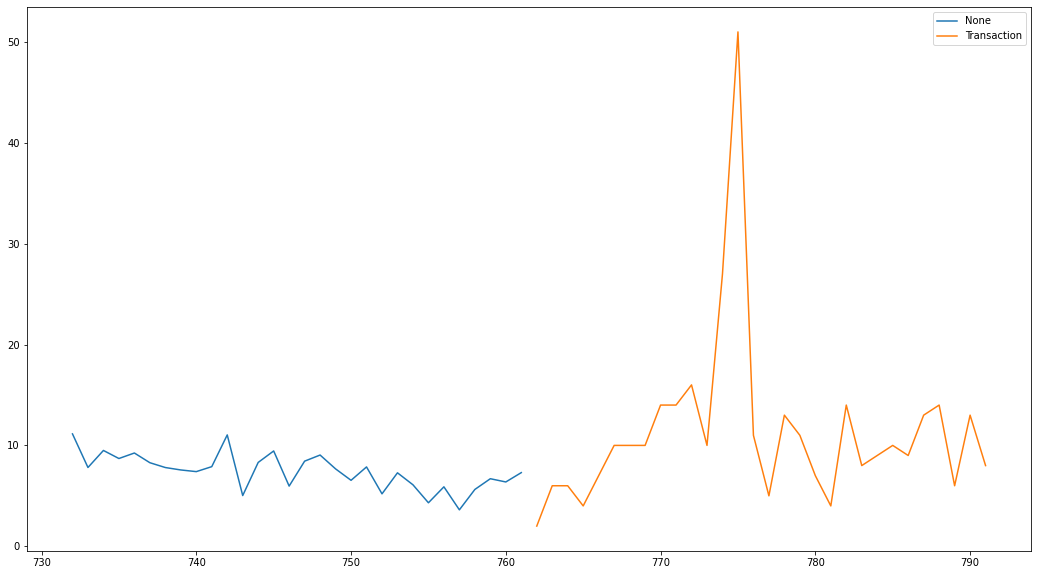

In [224]:
pred_df.plot(legend=True)
test_df['Transaction'].plot(legend=True)

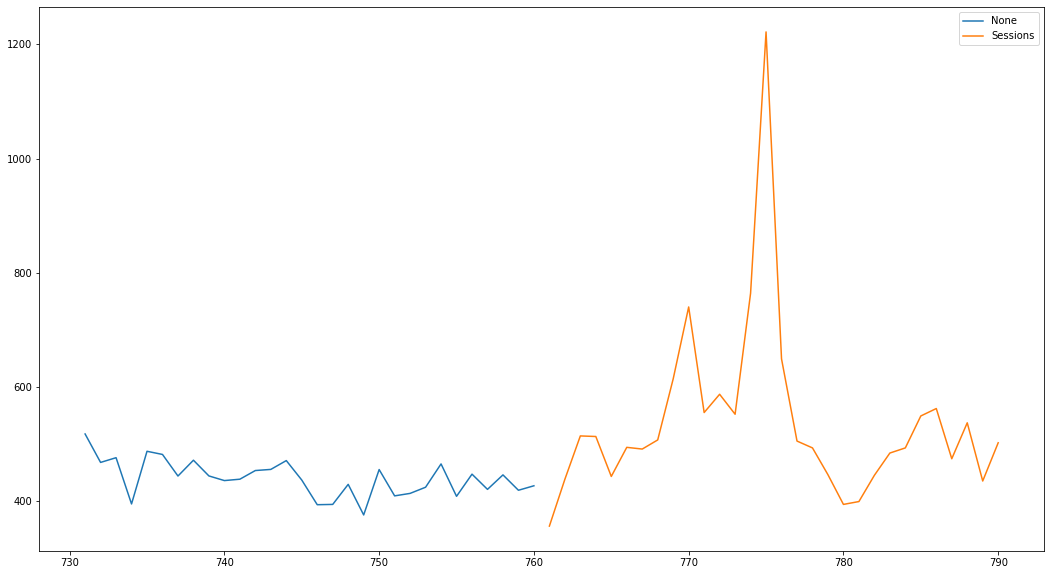

In [225]:
pred_d.plot(legend=True)
test_d['Sessions'].plot(legend=True)

In [226]:
print(test_df['Transaction'].mean())
print(test_d['Sessions'].mean())

11.4
538.5666666666667


In [228]:
rmse_df=sqrt(mean_squared_error(pred_df,test_df["Transaction"]))
print(rmse_df)

9.585131051615118


In [229]:
rmse_d = sqrt(mean_squared_error(pred_d, test_d['Sessions']))
print(rmse_df)

9.585131051615118


In [230]:
df['Transaction'].value_counts()

4     75
1     72
3     71
2     69
6     69
5     48
7     37
9     34
8     32
11    29
10    27
12    24
13    19
16    12
14    11
15    10
20     7
18     5
21     5
30     5
17     4
23     4
19     3
27     3
25     2
51     2
22     1
24     1
62     1
33     1
37     1
71     1
Name: Transaction, dtype: int64

In [231]:
df[df['Transaction'] == 71]

,Date,Transaction
579,2020-08-02,71


In [233]:
print(df['Transaction'].max())
print(d['Sessions'].max())
print(df['Transaction'].min())

71
1222
1


In [234]:
# df = df.set_index('Date')
# d = d.set_index('Date')

In [236]:
d.head()

,Sessions
Date,
2019-01-01,17
2019-01-02,16
2019-01-03,11
2019-01-04,14
2019-01-05,16


In [272]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
d['Date'] = pd.to_datetime(d['Date'],errors='coerce')

In [273]:
df = df.set_index('Date').resample('MS').mean()
d = d.set_index('Date').resample('MS').mean()

In [274]:
df = df[2:]
d = d[2:]

In [275]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations']
  for value, label in zip(result,labels):
    print(label+' : '+str(value))

  if result[1] <= 0.05:
    print("Data is Sationary")
  else:
    print("Data is non-Sationary")
  
print("Transaction Data")
adfuller_test(df['Transaction'])
print("Sessions Data")
adfuller_test(d['Sessions'])

Transaction Data
ADF Test Statistic : -2.2515904101363313
p-value : 0.18805639097891047
#Lags Used : 0
Number of Observations : 24
Data is non-Sationary
Sessions Data
ADF Test Statistic : -1.0319118474989173
p-value : 0.7414480164094825
#Lags Used : 0
Number of Observations : 24
Data is non-Sationary


In [276]:
df['Sale First Difference'] = df['Transaction'] - df['Transaction'].shift(1)
df['Seasonal First Difference']=df['Transaction']-df['Transaction'].shift(12)

d['Sale First Difference'] = d['Sessions'] - d['Sessions'].shift(1)
d['Seasonal First Difference']=d['Sessions']-d['Sessions'].shift(12)

df.head()

,Transaction,Sale First Difference,Seasonal First Difference
Date,,,
2019-03-01,2.290323,NaN,NaN
2019-04-01,3.333333,1.043011,NaN
2019-05-01,4.709677,1.376344,NaN
2019-06-01,3.900000,-0.809677,NaN
2019-07-01,2.516129,-1.383871,NaN


In [277]:
d.head()

,Sessions,forecast,Sale First Difference,Seasonal First Difference
Date,,,,
2019-03-01,177.935484,NaN,NaN,NaN
2019-04-01,230.933333,NaN,52.997849,NaN
2019-05-01,278.193548,NaN,47.260215,NaN
2019-06-01,157.900000,NaN,-120.293548,NaN
2019-07-01,168.322581,237.447815,10.422581,NaN


In [250]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.2026720044555699
p-value : 0.6724452281416115
#Lags Used : 3
Number of Observations : 9
Data is non-Sationary


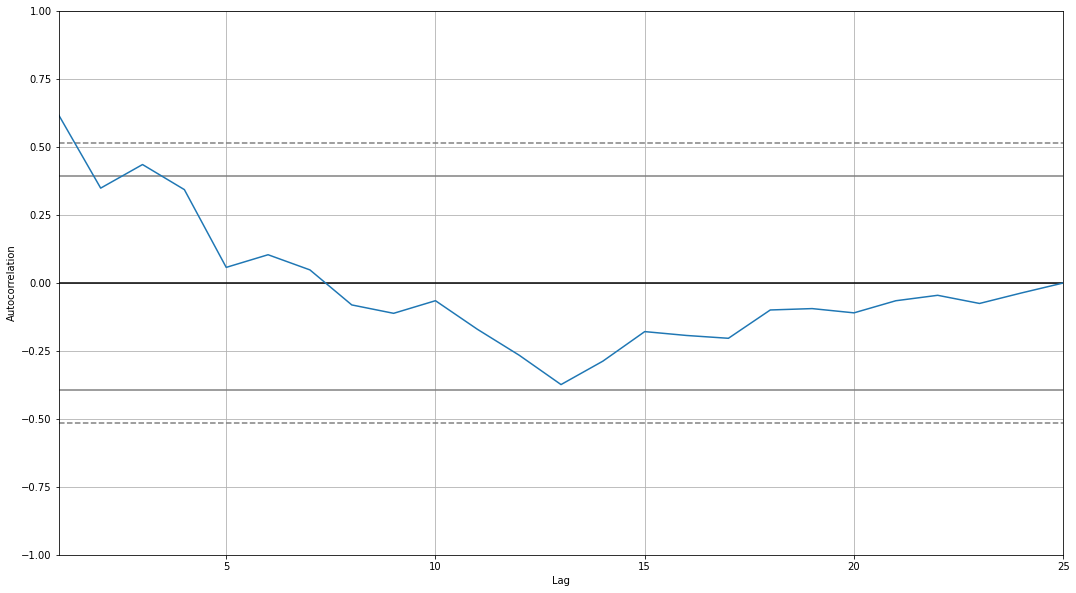

In [255]:
autocorrelation_plot(df['Transaction'])
plt.show()

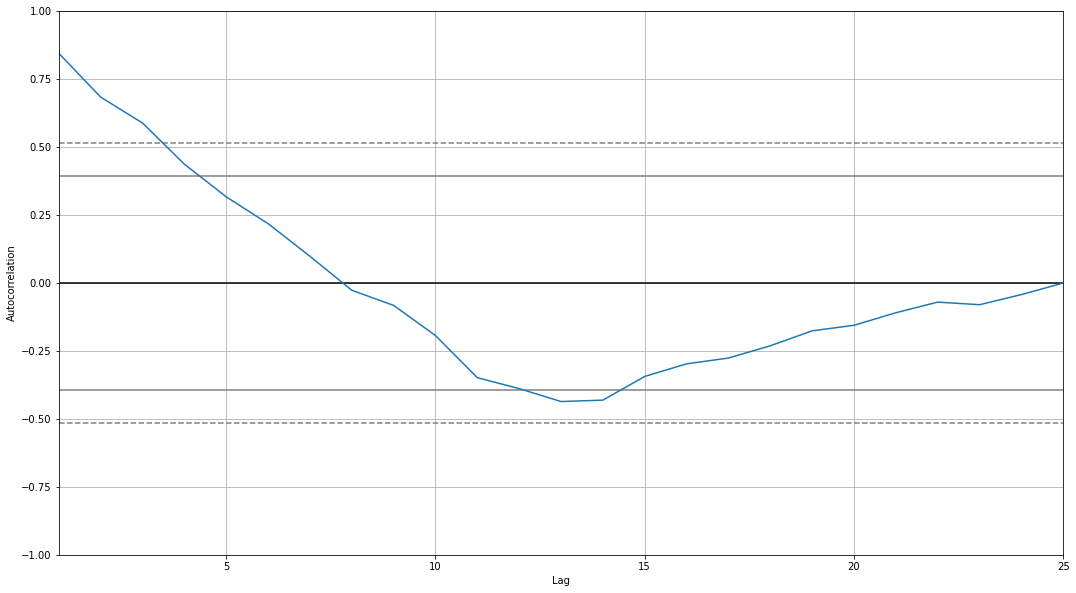

In [256]:
autocorrelation_plot(d['Sessions'])
plt.show()

In [278]:
d = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/session_date.csv')
df = pd.read_csv('https://raw.githubusercontent.com/taruntiwarihp/dataSets/master/CakeGift/transaction.csv')

In [279]:
model_df=ARIMA(df['Transaction'],order=(3,1,1))

model_fit_df=model_df.fit()
model_fit_df.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Transaction   No. Observations:                  791
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2375.103
Method:                       css-mle   S.D. of innovations              4.869
Date:                Mon, 08 Mar 2021   AIC                           4762.207
Time:                        07:40:57   BIC                           4790.246
Sample:                             1   HQIC                          4772.984
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0130      0.015      0.839      0.402      -0.017       0.043
ar.L1.D.Transaction     0.4980      0.039     12.642      0.000       0.421       0.575
ar.L2.D.Transaction    -0.0458      0.040     -1.135      0.256      -0.125       0.033
ar.L3.D.Transaction     0.1083      0.038      2.826      0.005       0.033       0.183
ma.L1.D.Transaction    -0.9619      0.016    -59.061      0.000      -0.994      -0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4912           -0.0000j            1.4912           -0.0000
AR.2           -0.5343           -2.4304j            2.4884           -0.2844
AR.3           -0.5343           +2.4304j            2.4884            0.2844
MA.1            1.0396           +0.0000j            1.0396            0.0000
-----------------------------------------------------------------------------
"""

In [280]:
model_d=ARIMA(d['Sessions'],order=(3,1,2))

model_fit_d=model_d.fit()
model_fit_d.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Sessions   No. Observations:                  790
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4682.288
Method:                       css-mle   S.D. of innovations             90.674
Date:                Mon, 08 Mar 2021   AIC                           9378.576
Time:                        07:40:59   BIC                           9411.280
Sample:                             1   HQIC                          9391.147
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6223      0.556      1.119      0.263      -0.468       1.713
ar.L1.D.Sessions    -0.5183      0.048    -10.852      0.000      -0.612      -0.425
ar.L2.D.Sessions     0.4874      0.063      7.759      0.000       0.364       0.611
ar.L3.D.Sessions     0.0757      0.043      1.770      0.077      -0.008       0.160
ma.L1.D.Sessions     0.0651      0.031      2.097      0.036       0.004       0.126
ma.L2.D.Sessions    -0.9025      0.029    -30.689      0.000      -0.960      -0.845
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0547           +0.0000j            1.0547            0.5000
AR.2            1.7545           +0.0000j            1.7545            0.0000
AR.3           -7.1370           +0.0000j            7.1370            0.5000
MA.1           -1.0172           +0.0000j            1.0172            0.5000
MA.2            1.0893           +0.0000j            1.0893            0.0000
-----------------------------------------------------------------------------
"""

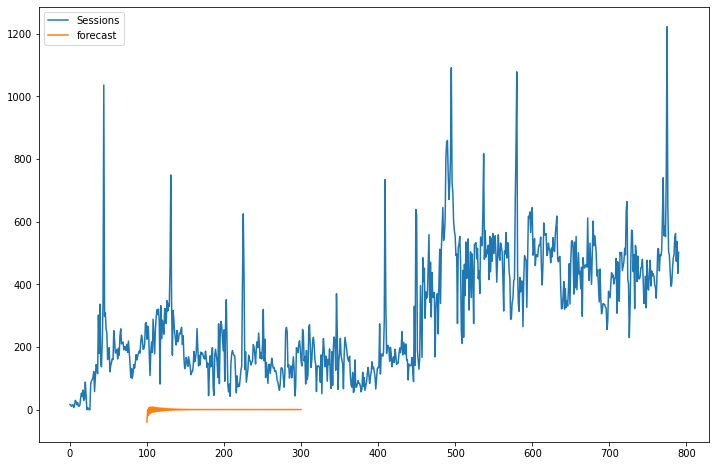

In [281]:
d['forecast'] = model_fit_d.predict(start=100, end=300, dynamic=True)
d[['Sessions','forecast']].plot(figsize=(12,8))

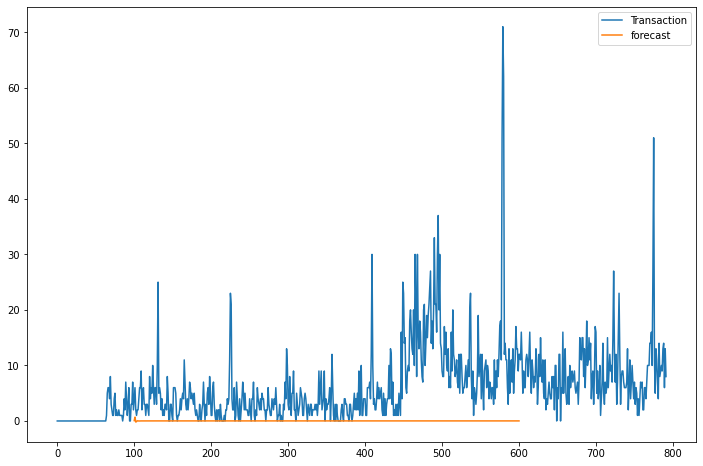

In [282]:
df['forecast']=model_fit_df.predict(start=100,end=600,dynamic=True)
df[['Transaction','forecast']].plot(figsize=(12,8))

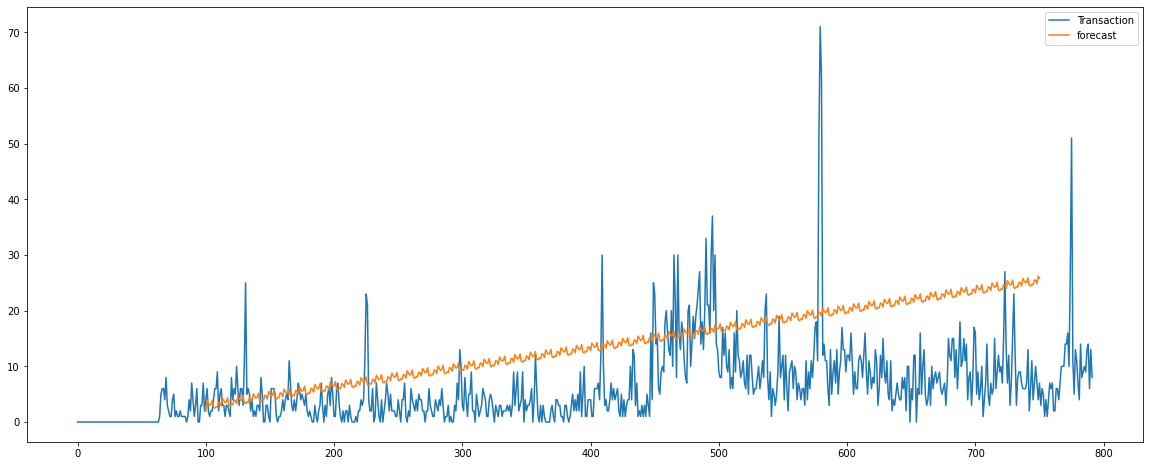

In [303]:
model_df = sm.tsa.statespace.SARIMAX(df['Transaction'],order=(3, 1, 1),seasonal_order=(1,1,1,12))
results_df = model_df.fit()
df['forecast']=results_df.predict(start=100,end=750,dynamic=True)
df[['Transaction','forecast']].plot(figsize=(20,8))

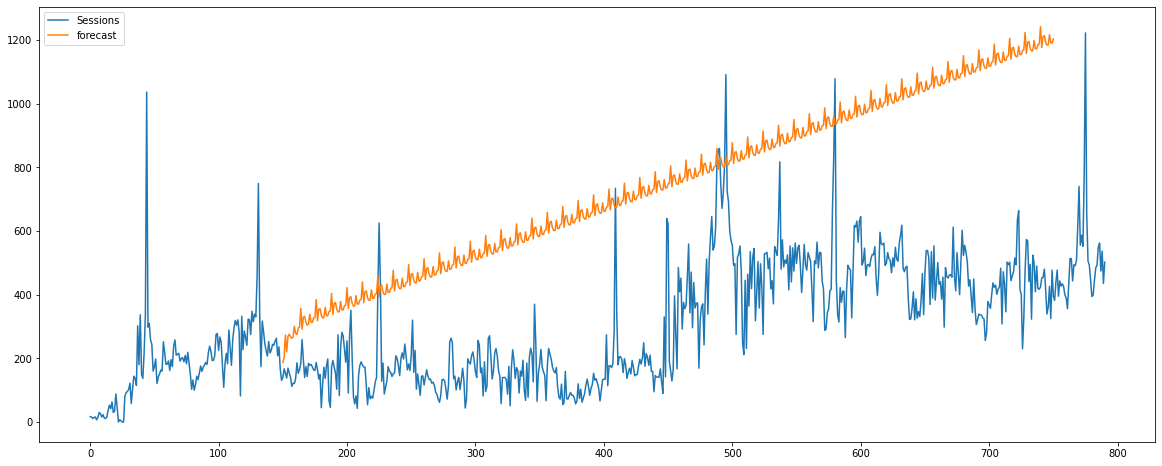

In [304]:
model_d=sm.tsa.statespace.SARIMAX(d['Sessions'],order=(3, 1, 2),seasonal_order=(1,1,1,12))
results_d=model.fit()
d['forecast']=results_d.predict(start=150,end=750,dynamic=True)
d[['Sessions','forecast']].plot(figsize=(20,8))

### Sale Prediction on March and April

In [308]:
index_future_dates = pd.date_range(start='2021-03-02',end='2021-05-1')
pred_df = results_df.predict(start=len(df),end=len(df)+60,typ='levels').rename('ARIMA Prediction')
pred_df.index = index_future_dates
print(pred_df)

2021-03-02     7.935105
2021-03-03     8.714398
2021-03-04    10.326929
2021-03-05    11.526344
2021-03-06    11.471381
                ...    
2021-04-27    10.649822
2021-04-28    11.202083
2021-04-29    11.093193
2021-04-30    10.586571
2021-05-01    10.094584
Freq: D, Name: ARIMA Prediction, Length: 61, dtype: float64


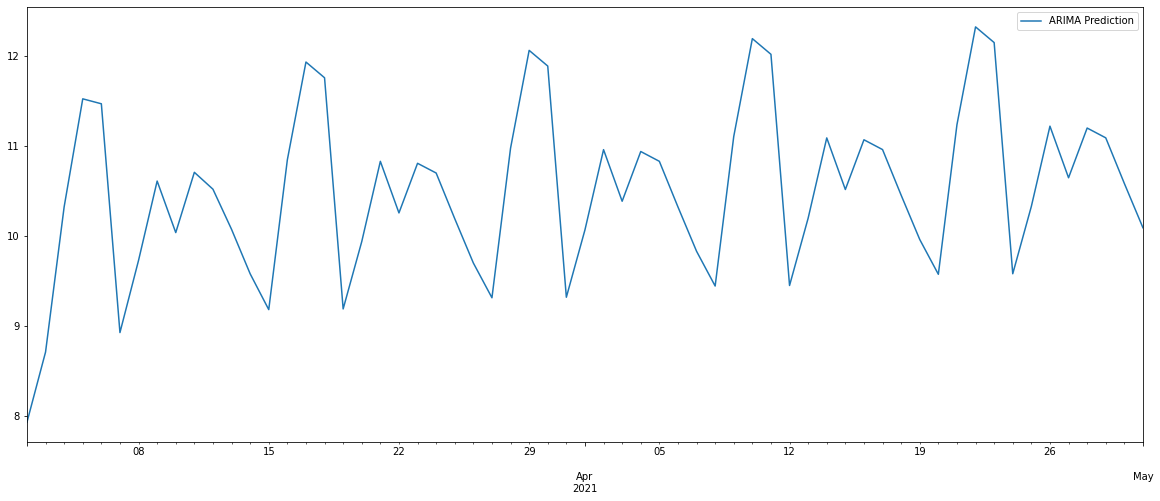

In [309]:
pred_df.plot(figsize=(20,8),legend=True)

### Web traffic Prediction on March and April month

In [310]:
index_future_dates = pd.date_range(start='2021-03-02',end='2021-05-1')
pred_d = results_d.predict(start=len(d),end=len(d)+60,typ='levels').rename('ARIMA Prediction')
pred_d.index = index_future_dates
print(pred_d)

2021-03-02    476.256733
2021-03-03    483.229432
2021-03-04    468.819888
2021-03-05    496.132261
2021-03-06    515.284485
                 ...    
2021-04-27    544.929540
2021-04-28    560.954654
2021-04-29    555.081481
2021-04-30    561.423022
2021-05-01    553.477481
Freq: D, Name: ARIMA Prediction, Length: 61, dtype: float64


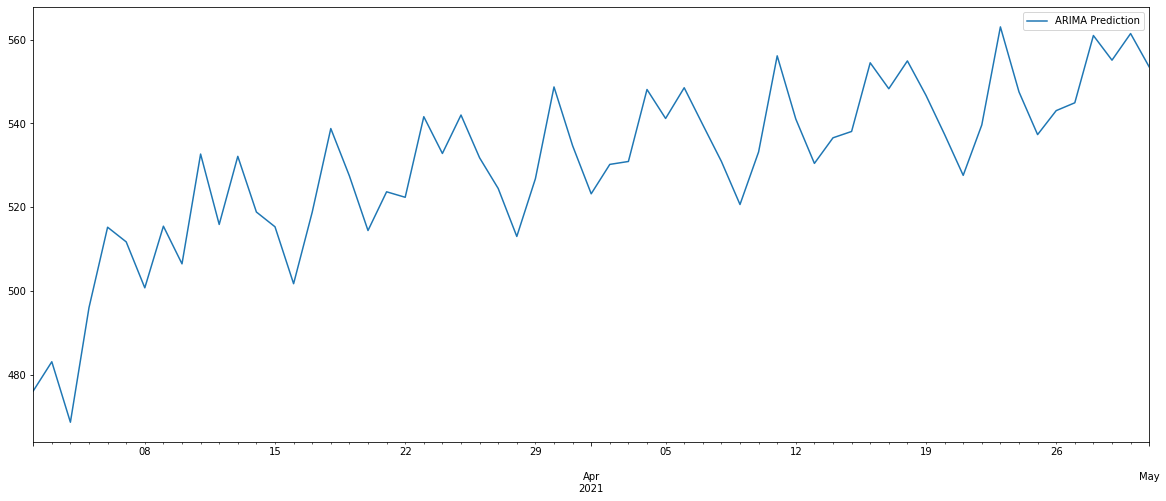

In [311]:
pred_d.plot(figsize=(20,8),legend=True)